In [1]:
from sph_numba import main as main_numba
from sph_cupy import main as main_cupy
from sph_torch import main as main_torch
from sph_cythoncode import run as main_cython
from sph import main as main_plain
from time import time_ns

# Benchmarking times 
benchmark the different algorithms without their matplotlib functions, benchmark over 50 iterations

In [3]:
def benchmark_jit(fn, i_count, args={"N":400}):
	total_time = 0
	first_run_time = 0
	for i in range(i_count):
		t1 = time_ns()
		fn(args)
		t2 = time_ns()
		time_passed = (t2 - t1)/1e9
		if i==0:
			first_run_time = time_passed
		else:
			total_time += time_passed

	return total_time / (i_count-1), first_run_time

def benchmark(fn, i_count, args={"N":400}):
	total_time = 0
	for i in range(i_count):
		t1 = time_ns()
		fn()
		t2 = time_ns()
		time_passed = (t2 - t1)/1e9
		total_time += time_passed

	return total_time / i_count

# avg_time = benchmark(main_plain, 10)
# print(f"cupy took on average {avg_time:02f} s over 50 iterations")

# avg_time, first_time = benchmark_jit(main_numba, 50)
# print(f"cython took on average {avg_time:02f} s over 50 iterations, first run took {first_time}")

# avg_time = benchmark(main_cupy, 50)
# print(f"cupy took on average {avg_time:02f} s over 50 iterations")

avg_time = benchmark(main_torch,50)
print(f"torch took on average {avg_time:02f} s over 50 iterations")
# Plain SPH code
# main took 6.0868 s
# Numba SPH code
# main took 5.6961 s
# Cython SPH code
# main took 18.8142 s
# GPU SPH code
# main took 1.3467 s

main took 0.7827 s
main took 0.6901 s
main took 0.7544 s
main took 0.6248 s
main took 0.6773 s
main took 0.7108 s
main took 0.7242 s
main took 0.7118 s
main took 0.6499 s
main took 0.6645 s
main took 0.7299 s
main took 0.7323 s
main took 0.6575 s
main took 0.7130 s
main took 0.7151 s
main took 0.6556 s
main took 0.7905 s
main took 0.6723 s
main took 0.6452 s
main took 0.7224 s
main took 0.7493 s
main took 0.6789 s
main took 0.6803 s
main took 0.6471 s
main took 0.6948 s
main took 0.6305 s
main took 0.7692 s
main took 0.7360 s
main took 0.8237 s
main took 0.7496 s
main took 0.7518 s
main took 0.8327 s
main took 0.8361 s
main took 0.7732 s
main took 0.6823 s
main took 0.7463 s
main took 0.6786 s
main took 0.7065 s
main took 0.7741 s
main took 0.6977 s
main took 0.8746 s
main took 0.7066 s
main took 0.7254 s
main took 0.7498 s
main took 0.6762 s
main took 0.9715 s
main took 0.8107 s
main took 0.7690 s
main took 0.8013 s
main took 0.8633 s
torch took on average 0.732331 s over 50 iteration

# Effect of increasing amount of nodes

# Lineprofiling

/home/sacation/miniconda3/envs/wsl/lib/python3.9/site-packages/line_profiler/line_profiler.py:75: UserWarning: Adding a function with a __wrapped__ attribute. You may want to profile the wrapped function by adding main.__wrapped__ instead.
  self.add_function(func)


main took 1.5959 s
Timer unit: 1e-09 s

Total time: 1.59599 s
File: /mnt/d/Projects/kth/hpc/HPC-SPH/profiling/profiling_tools.py
Function: measure_time at line 9

Line #      Hits         Time  Per Hit   % Time  Line Contents
     9                                               @wraps(fn)
    10                                               def measure_time(*args, **kwargs):
    11         1       1700.0   1700.0      0.0          t1 = timer()
    12         1 1595885484.0    2e+09    100.0          result = fn(*args, **kwargs)
    13         1       1600.0   1600.0      0.0          t2 = timer()
    14                                           
    15                                                   # Append durations to the correct list, in order to compute the average and especially std
    16         1       1200.0   1200.0      0.0          if "serial" in fn.__name__:
    17                                                       serial_durations.append((t2 - t1)/1e9)
    18       

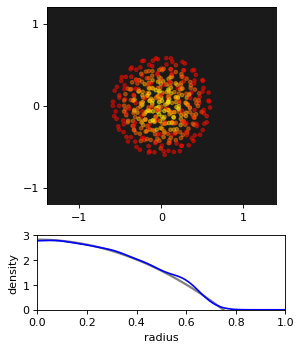

In [2]:
from line_profiler import LineProfiler
from sph_cupy import main, getAcc, gradW, getPairwiseSeparations

lp = LineProfiler()
lp.add_function(getAcc)
lp.add_function(gradW)
lp.add_function(getPairwiseSeparations)
wrapper = lp(main)
wrapper()
lp.print_stats()